In [48]:
from IPython.display import HTML

HTML('<div style="font-size: 30px; font-weight: bold;">'
     'A Report on Analysis of HDB Resale Market '
     '</div>')

In [ ]:
Source: https://github.com/rick7122003/Kee-Siong/blob/main/README.md


Overview and Data Summary

Project Overview:
- This analysis focuses on the HDB resale market from February 2000 to January 2024.
- The dataset contains 628,591 rows and 11 columns, including town names, flat types, floor area, flat model, lease commence date, resale price, and remaining lease.

Data Summary:
- Data comprises HDB resale transactions, including town names, flat types, floor area, flat model, lease commence date, resale price, and remaining lease.
- Data is pre-processed through normalization and cleaning to ensure readiness for analysis.
- Missing data in remaining lease is handled by focusing on lease commence date instead.

 Data Characteristics and Quality

Dataset Characteristics:
- Size: 628,591 rows, 11 columns.
- Memory usage: 52.8+ MB.
- Data Types: 2 float64, 2 int64, 7 objects.
- No null or empty values after cleaning.

Descriptive Statistics:
- The dataset is comprehensive, with no missing values post-cleaning.
- The shape and memory usage make it suitable for detailed analysis.

Outliers:
- High prices (max: $1,500,000) and very low prices (min: $28,000) may indicate outliers.
- Large flats (max: 297 sqm) and very small flats (min: 28 sqm) should be investigated for consistency.

Insights and Model Development

Key Correlations:
- Floor area sqm and resale price show a strong positive correlation (0.53).
- Lease commence date and resale price have a moderate positive correlation (0.47).

Model Development:
- Three models were evaluated: Linear Regression, Random Forest Regressor, and Decision Tree Regressor.
- Linear Regression Model:
  - R-squared: 0.806, indicating 80.6% variance explained.
  - Metrics: MSE: 5,194,369,915, RMSE: 72,071.98, MAE: 54,498.66.
- Random Forest Regressor Model:
  - Key features: flat type and town.
  - Limited predictive power with an R-squared of 0.089.
- Decision Tree Regressor Model:
  - Identified important features but had limited accuracy with an R-squared of 0.089.

Conclusion:
- Linear Regression Model is most suitable for predicting HDB resale prices.
- Key insights include the significance of flat size and lease commencement date on resale prices.
- Town location play importance with HDB resale prices
- Further analysis can focus on improving model accuracy and exploring additional features.



In [46]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Please find python generated dataframe tables, printouts and visuals below:'
     '</div>')

In [45]:
from IPython.display import HTML

HTML('<div style="font-size: 15px; font-weight: bold;">'
     'Please find python generated dataframe table and Printouts:'
     '</div>')

In [3]:
import pandas as pd                     # library for data manipulation and preparation           
import seaborn as sns                   # library for customized data visualization
import plotly.express as px             # library for customized data visualization
from matplotlib import pyplot as plt    # library for customized data visualization

# To suppress scientific notations, if any.
import numpy as np
np.set_printoptions(suppress=True)

# To filter out unnecessary warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load the CSV file
df = pd.read_csv('hdb.csv')

# Convert 'month' column to datetime64 format
df['month'] = pd.to_datetime(df['month'], format='%Y-%m') 

# Print the DataFrame to verify the conversion
print(df.head())

df = 'hdb'

       month         town flat type block   street name storey range  \
0 2020-08-01  BUKIT MERAH    3 ROOM   96A  HENDERSON RD     10 TO 12   
1 2020-10-01  BUKIT MERAH    4 ROOM   95C  HENDERSON RD     46 TO 48   
2 2021-01-01  BUKIT MERAH    3 ROOM   96B  HENDERSON RD     19 TO 21   
3 2023-08-01   QUEENSTOWN    3 ROOM    37   MARGARET DR     25 TO 27   
4 2021-01-01  BUKIT MERAH    4 ROOM   95C  HENDERSON RD     43 TO 45   

   floor area sqm         flat model  lease commence date   resale price   \
0            68.0            Model A                 2019          612000   
1            93.0            Model A                 2019         1000000   
2            68.0            Model A                 2019          668000   
3            62.0  Premium Apartment                 2022          750000   
4            93.0            Model A                 2019          910000   

   remaining Lease  
0             97.9  
1             97.7  
2             97.5  
3             97.5  

In [17]:
# clean column month to datetime64 format

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628591 entries, 0 to 628590
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                628591 non-null  datetime64[ns]
 1   town                 628591 non-null  object        
 2   flat type            628591 non-null  object        
 3   block                628591 non-null  object        
 4   street name          628591 non-null  object        
 5   storey range         628591 non-null  object        
 6   floor area sqm       628591 non-null  float64       
 7   flat model           628591 non-null  object        
 8   lease commence date  628591 non-null  int64         
 9    resale price        628591 non-null  int64         
 10  remaining Lease      628591 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 52.8+ MB
None


In [12]:
# check for missing values

df.isnull().sum()

month                  0
town                   0
flat type              0
block                  0
street name            0
storey range           0
floor area sqm         0
flat model             0
lease commence date    0
 resale price          0
remaining Lease        0
dtype: int64

In [13]:
df.head()

,month,town,flat type,block,street name,storey range,floor area sqm,flat model,lease commence date,resale price,remaining Lease
0,2020-08-01,BUKIT MERAH,3 ROOM,96A,HENDERSON RD,10 TO 12,68.0,Model A,2019,612000,97.9
1,2020-10-01,BUKIT MERAH,4 ROOM,95C,HENDERSON RD,46 TO 48,93.0,Model A,2019,1000000,97.7
2,2021-01-01,BUKIT MERAH,3 ROOM,96B,HENDERSON RD,19 TO 21,68.0,Model A,2019,668000,97.5
3,2023-08-01,QUEENSTOWN,3 ROOM,37,MARGARET DR,25 TO 27,62.0,Premium Apartment,2022,750000,97.5
4,2021-01-01,BUKIT MERAH,4 ROOM,95C,HENDERSON RD,43 TO 45,93.0,Model A,2019,910000,97.4


In [14]:
# Articulate the size and shape of the dataset :

# Size: Total: 628591 rows | memory usage: 52.8+ MB
# Shape: 11 columns: 7 objects, 2 Float64, 2 int64 | 628591 rows 

# Comment on data quality with respect to null values or missing data :

# Output shows no null or empty values after cleaning
# Remove need for further data imputation and promote better analysis.


In [15]:
# Statistical description of the data

hdb.describe()

,floor area sqm,lease commence date,resale price,remaining Lease
count,628591.000000,628591.000000,6.285910e+05,628591.000000
mean,96.767132,1990.411314,3.620510e+05,24.540975
std,25.051891,11.335256,1.643300e+05,35.885856
min,28.000000,1966.000000,2.800000e+04,0.000000
25%,74.000000,1983.000000,2.400000e+05,0.000000
50%,96.000000,1988.000000,3.380000e+05,0.000000
75%,113.000000,1998.000000,4.500000e+05,63.400000
max,297.000000,2022.000000,1.500000e+06,97.900000


In [18]:
## Provide descriptive statistics and information for the entire dataset.

# Display general information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628591 entries, 0 to 628590
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                628591 non-null  datetime64[ns]
 1   town                 628591 non-null  object        
 2   flat type            628591 non-null  object        
 3   block                628591 non-null  object        
 4   street name          628591 non-null  object        
 5   storey range         628591 non-null  object        
 6   floor area sqm       628591 non-null  float64       
 7   flat model           628591 non-null  object        
 8   lease commence date  628591 non-null  int64         
 9    resale price        628591 non-null  int64         
 10  remaining Lease      628591 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 52.8+ MB
None


In [19]:
## Provide descriptive statistics and information for the entire dataset.

# Descriptive statistics for numerical columns
print(df.describe())

# Descriptive statistics for categorical columns
for column in df.select_dtypes(include=['object']):
    print(f"\nDescriptive Statistics for {column}:")
    print(df[column].value_counts())

                               month  floor area sqm  lease commence date  \
count                         628591   628591.000000        628591.000000   
mean   2010-12-30 00:44:40.555083264       96.767132          1990.411314   
min              2000-01-01 00:00:00       28.000000          1966.000000   
25%              2004-08-01 00:00:00       74.000000          1983.000000   
50%              2010-02-01 00:00:00       96.000000          1988.000000   
75%              2017-08-01 00:00:00      113.000000          1998.000000   
max              2024-01-01 00:00:00      297.000000          2022.000000   
std                              NaN       25.051891            11.335256   

        resale price   remaining Lease  
count    6.285910e+05    628591.000000  
mean     3.620510e+05        24.540975  
min      2.800000e+04         0.000000  
25%      2.400000e+05         0.000000  
50%      3.380000e+05         0.000000  
75%      4.500000e+05        63.400000  
max      1.500000e+

In [43]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Visuals 1, 2 & 3'
     '</div>')

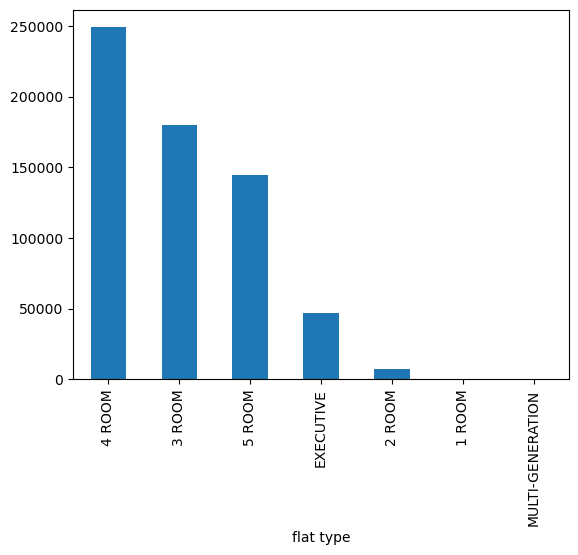

<Figure size 1000x600 with 0 Axes>

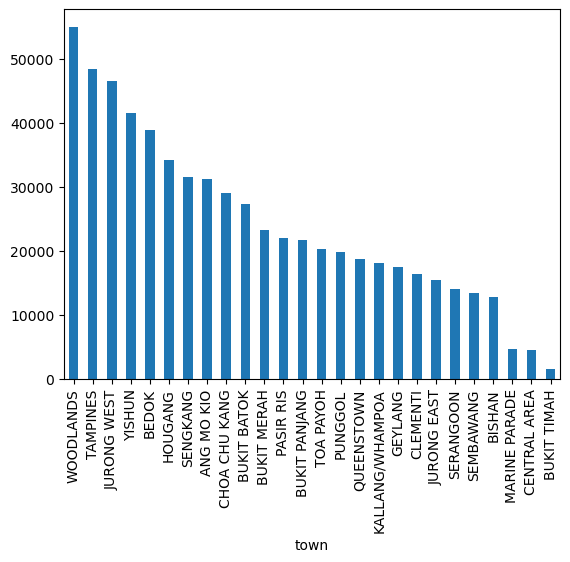

<Figure size 1000x600 with 0 Axes>

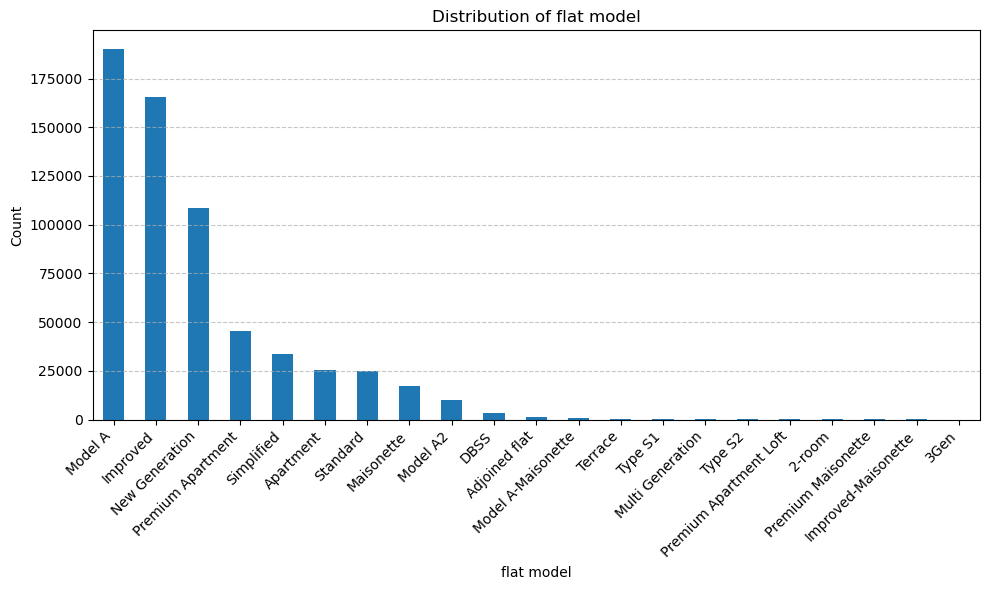

In [20]:
## Flat type

# Assuming 'df' is DataFrame and 'column_name' is the categorical column

df['flat type'].value_counts().plot(kind='bar') 
plt.figure(figsize=(10, 6))
plt.show() 

## town

# Assuming 'df' is DataFrame and 'column_name' is the categorical column

df['town'].value_counts().plot(kind='bar')
plt.figure(figsize=(10, 6))
plt.show() 

## flat model

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
df['flat model'].value_counts().plot(kind='bar')

# Customize the plot for better presentation
plt.title(f'Distribution of {'flat model'}')  # Informative title
plt.xlabel('flat model')  # Clear x-axis label
plt.ylabel('Count')  # Clear y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Display the plot
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

In [42]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Visuals 4, 5, 6, 7, 8'
     '</div>')

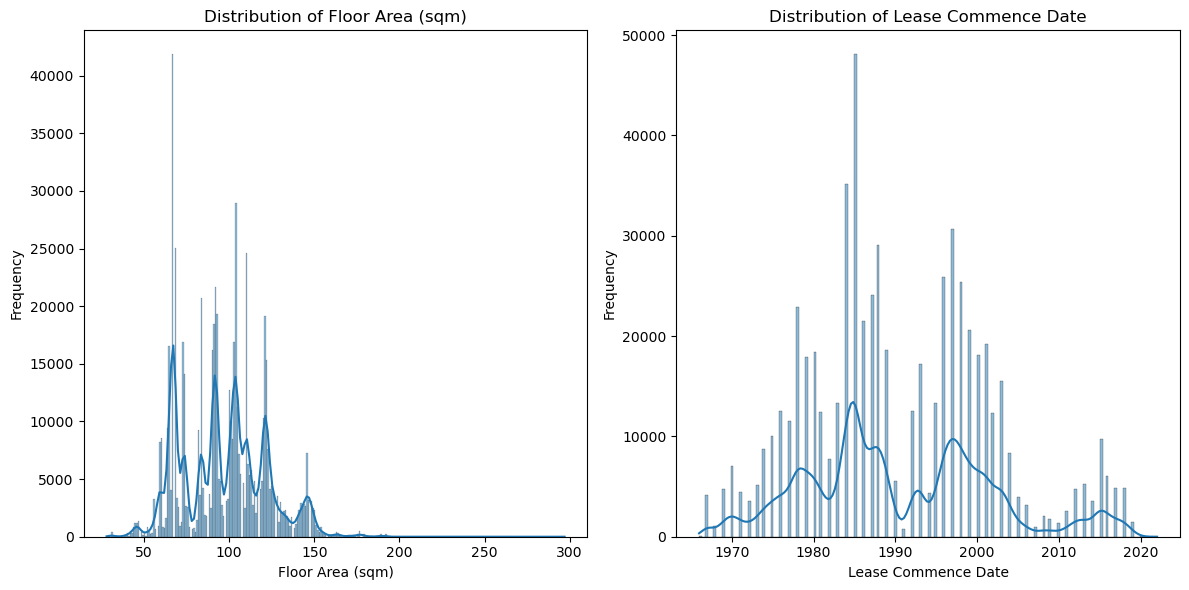

In [21]:
# Histograms for 'floor area sqm' and 'lease commence date'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for 'floor area sqm'
sns.histplot(data=df, x='floor area sqm', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Floor Area (sqm)')
axes[0].set_xlabel('Floor Area (sqm)')
axes[0].set_ylabel('Frequency')

# Histogram for 'lease commence date'
sns.histplot(data=df, x='lease commence date', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Lease Commence Date')
axes[1].set_xlabel('Lease Commence Date')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

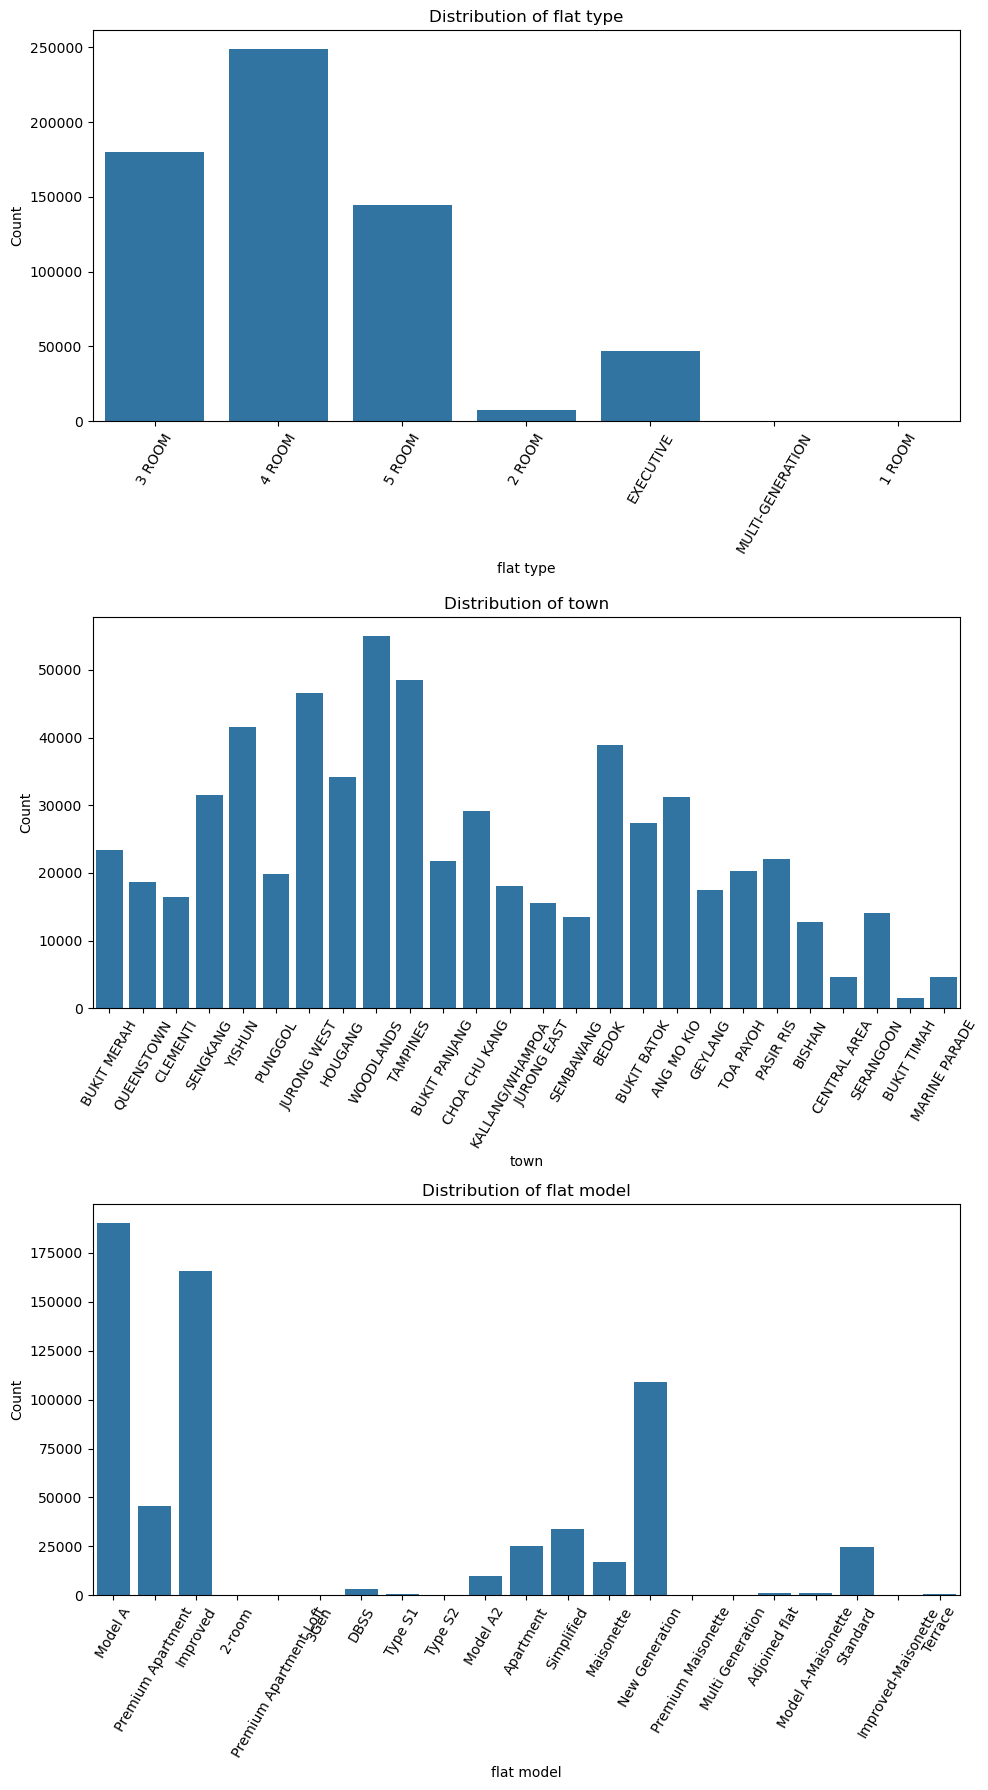

In [22]:
# List of categorical columns to plot
categorical_columns = ['flat type', 'town', 'flat model']

# Create subplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 6*len(categorical_columns)))

# Create countplots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=60) 

plt.tight_layout()
plt.show()

In [41]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Visuals 13, 14, 15, 16, 17, 18, 19'
     '</div>')

In [ ]:
## Generate appropriate charts for numerical features, both individually and in relation to the target column.

In [ ]:
# Understanding the correlation between the variables

import seaborn as sns 
import pandas as pd 

# Load the CSV file
df = pd.read_csv('hdb.csv')

# 'hdb' is my DataFrame
sns.pairplot(data=df, hue="town")

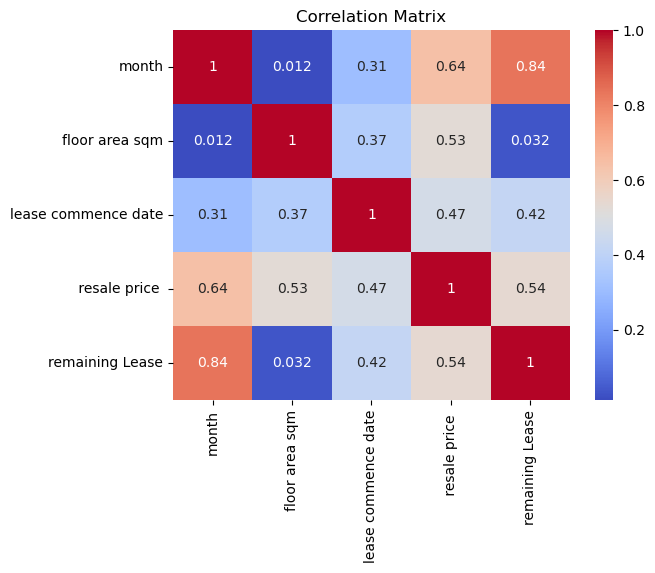

,floor area sqm,lease commence date,resale price,remaining Lease
count,628591.000000,628591.000000,6.285910e+05,628591.000000
mean,96.767132,1990.411314,3.620510e+05,24.540975
std,25.051891,11.335256,1.643300e+05,35.885856
min,28.000000,1966.000000,2.800000e+04,0.000000
25%,74.000000,1983.000000,2.400000e+05,0.000000
50%,96.000000,1988.000000,3.380000e+05,0.000000
75%,113.000000,1998.000000,4.500000e+05,63.400000
max,297.000000,2022.000000,1.500000e+06,97.900000


In [25]:
# Correlation matrix

num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
       num_cols.append(column)
        
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

hdb.describe()

In [26]:
## 12. Visual Exploration:

## Based on the project's objectives, create at least five visualizations using Python or Power BI. 
## Explain your choice of visualization type and tool for each.

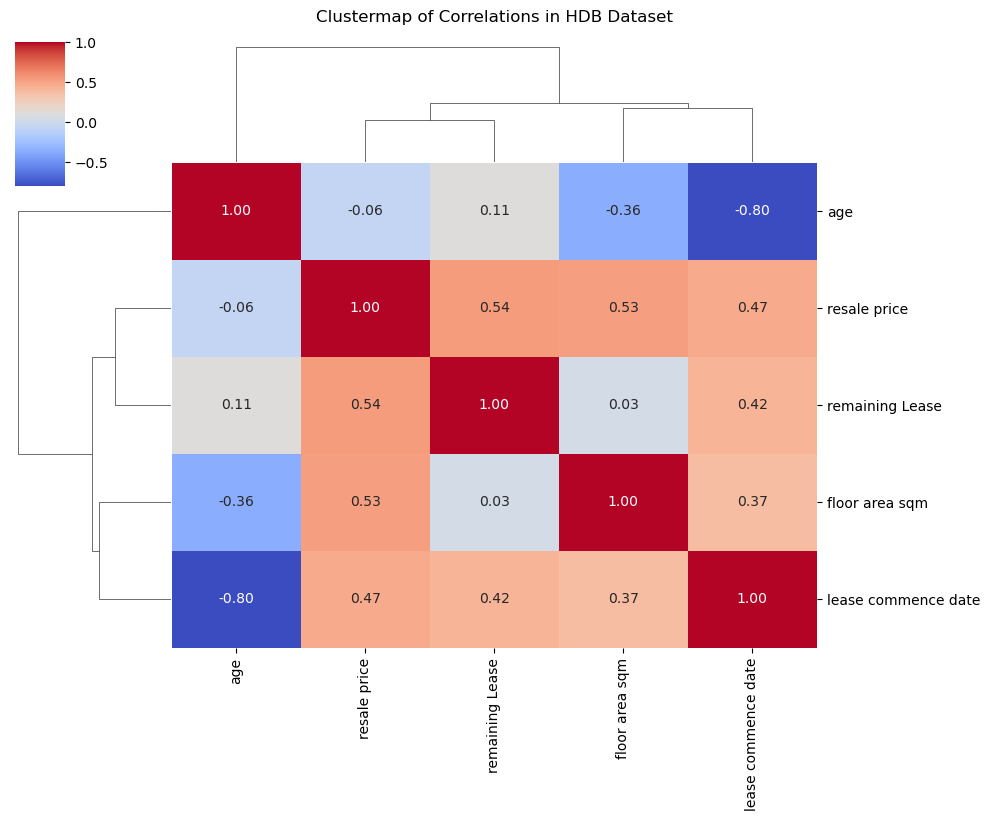

In [63]:
# Clustermap of Correlations in HDB Dataset

# Clean column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Select numeric columns for correlation plot
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a clustermap (heatmap with hierarchical clustering)
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', figsize=(10, 8))

# Add title
plt.suptitle('Clustermap of Correlations in HDB Dataset', y=1.02)

# Display the plot
plt.show()

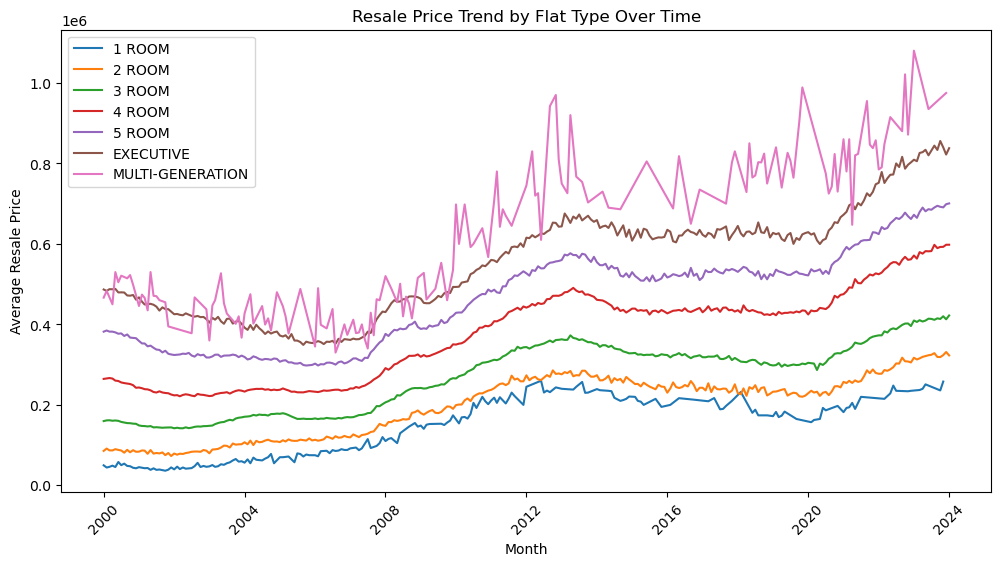

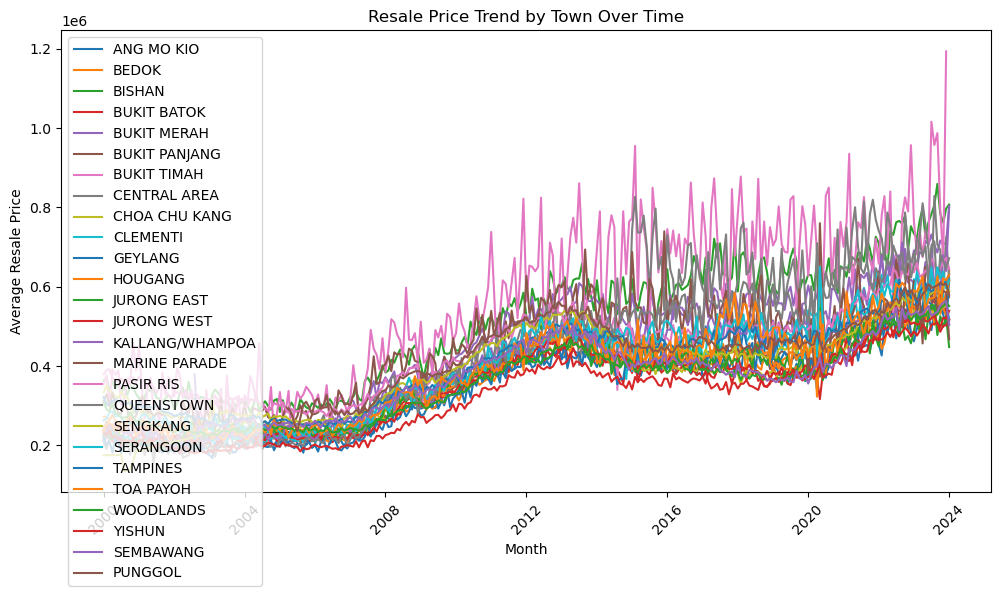

In [29]:
# Load the dataset
hdb = pd.read_csv("hdb.csv", names=['month', 'town', 'flat type', 'block', 'street name', 'storey range', 'floor area sqm', 'flat model', 'lease commence date', ' resale price ', 'remaining Lease'], header=0)

# Convert 'month' to datetime for proper time series plotting
hdb['month'] = pd.to_datetime(hdb['month'], format='%Y-%m')

# 1. Line chart for "flat type" vs "resale price" over time

# Group by 'month' and 'flat type', calculate mean resale price
flat_type_avg_price = hdb.groupby(['month', 'flat type'])[' resale price '].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
for flat_type in flat_type_avg_price['flat type'].unique():
    data = flat_type_avg_price[flat_type_avg_price['flat type'] == flat_type]
    plt.plot(data['month'], data[' resale price '], label=flat_type)

plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.title('Resale Price Trend by Flat Type Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 2. Line chart for "town" vs "resale price" over time

# Group by 'month' and 'town', calculate mean resale price
town_avg_price = hdb.groupby(['month', 'town'])[' resale price '].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
for town in town_avg_price['town'].unique():
    data = town_avg_price[town_avg_price['town'] == town]
    plt.plot(data['month'], data[' resale price '], label=town)

plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.title('Resale Price Trend by Town Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

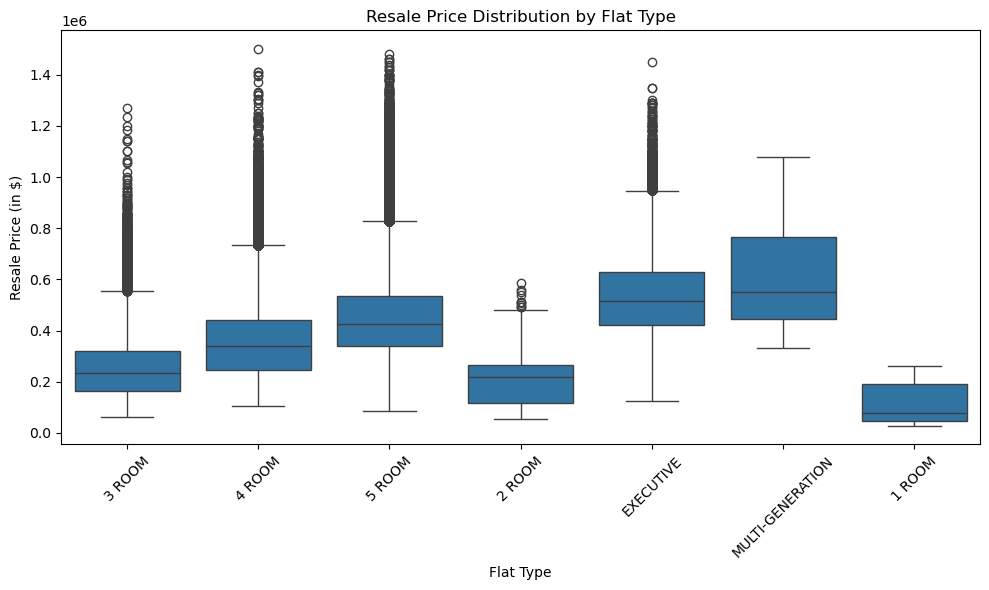

In [35]:
# Box plot of resale price by flat type
plt.figure(figsize=(10, 6))
sns.boxplot(x='flat type', y='resale price', data=hdb)
plt.title('Resale Price Distribution by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (in $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

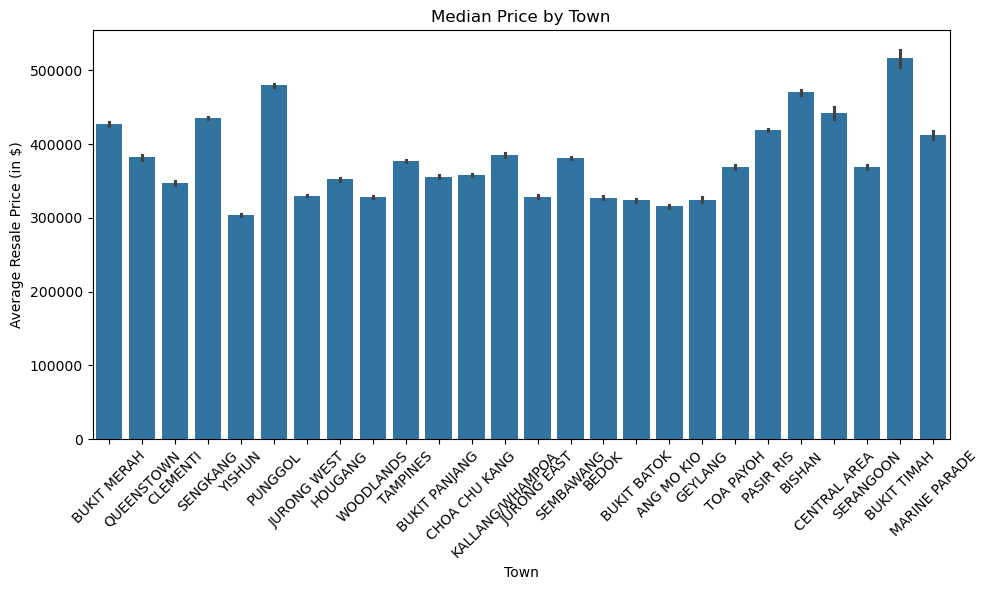

In [33]:
# Group by 'town' and calculate average resale price
plt.figure(figsize=(10, 6))
sns.barplot(x='town', y='resale price', data=hdb, estimator=lambda x: x.mean())
plt.title('Median Price by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price (in $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Interactive scatter plot using "Plotly" visualization library

# fig = px.scatter_matrix(hdb, width=800, height=800)
# fig.show()

In [61]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Machine Learning Model 1 - A Linear Regression model. Resales Price versus Flat Type over time'
     '</div>')

In [ ]:
## MACHINE LEARNING Model 1 - resales price versus flat type over time - Linear Regression model

Mean Squared Error (MSE): 5194369915.213859
Root Mean Squared Error (RMSE): 72071.9773227699
R-squared (R²): 0.8068809275566823
Mean Absolute Error (MAE): 54498.6556327262


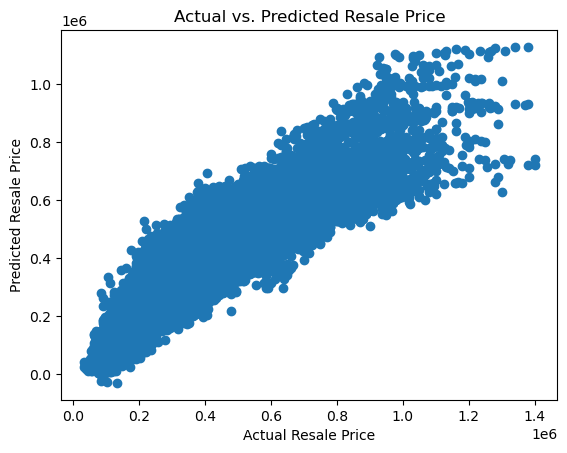

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data (Assuming 'hdb.csv' is in the same directory)
df = pd.read_csv('hdb.csv')

# Clean and preprocess data
df.columns = df.columns.str.strip()
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['resale price'] = df['resale price'].replace(r'\$', '', regex=True).replace(r',', '', regex=True).astype(float)

# Feature engineering: Create dummy variables for relevant features
df = pd.get_dummies(df, columns=['flat type', 'town', 'flat model'], drop_first=True)

# Extract year and month as separate features
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

# Select features and target variable
X = df[['year', 'month'] + [col for col in df.columns if col.startswith('flat type') or col.startswith('town') or col.startswith('flat model')]]
y = df['resale price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Actual vs. Predicted Resale Price")
plt.show()

In [64]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Machine Learning Model 2 - # Random Forest Regressor Model'
     '</div>')

In [ ]:
## Machine learning Model 2 - # Random Forest Regressor Model

Mean Squared Error (MSE): 1923369010.6336012
Root Mean Squared Error (RMSE): 43856.231149445586
R-squared (R²): 0.9284919546811886
Mean Absolute Error (MAE): 29068.59044440389


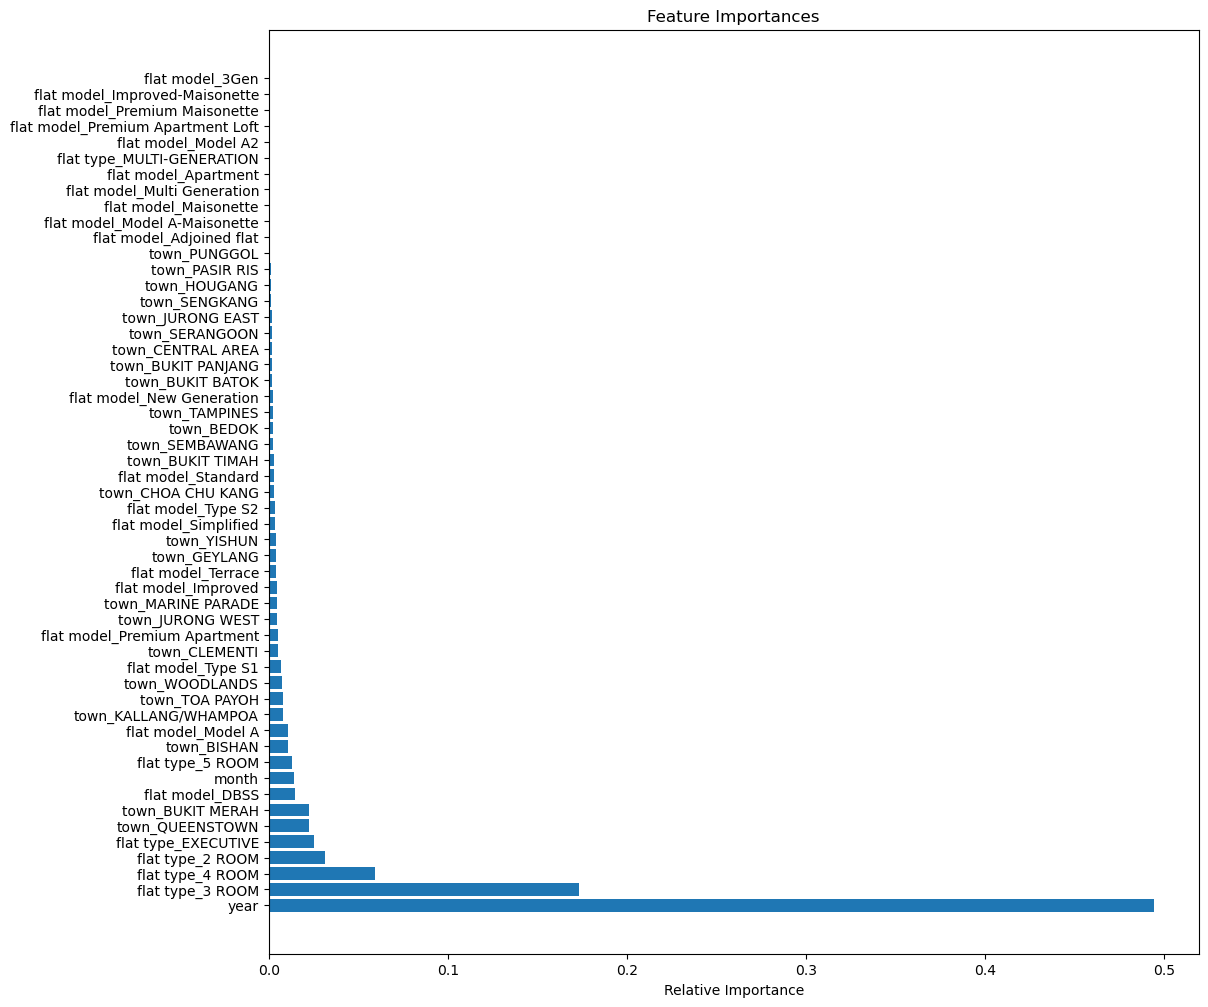

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data (Assuming 'hdb.csv' is in the same directory)
df = pd.read_csv('hdb.csv')

# Clean and preprocess data
df.columns = df.columns.str.strip()
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['resale price'] = df['resale price'].replace(r'\$', '', regex=True).replace(r',', '', regex=True).astype(float)

# Feature engineering: Create dummy variables for relevant features
df = pd.get_dummies(df, columns=['flat type', 'town', 'flat model'], drop_first=True)

# Extract year and month as separate features
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

# Select features and target variable
X = df[['year', 'month'] + [col for col in df.columns if col.startswith('flat type') or col.startswith('town') or col.startswith('flat model')]]
y = df['resale price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Feature importance chart
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [65]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'Machine Learning Model 3 # Decision Tree Regressor Model'
     '</div>')

In [ ]:
## Machine Learning Model 3 # Decision Tree Regressor Model

Mean Squared Error (MSE): 2029172233.9206219
Root Mean Squared Error (RMSE): 45046.33430059123
R-squared (R²): 0.9245583456629212
Mean Absolute Error (MAE): 29603.448675395186


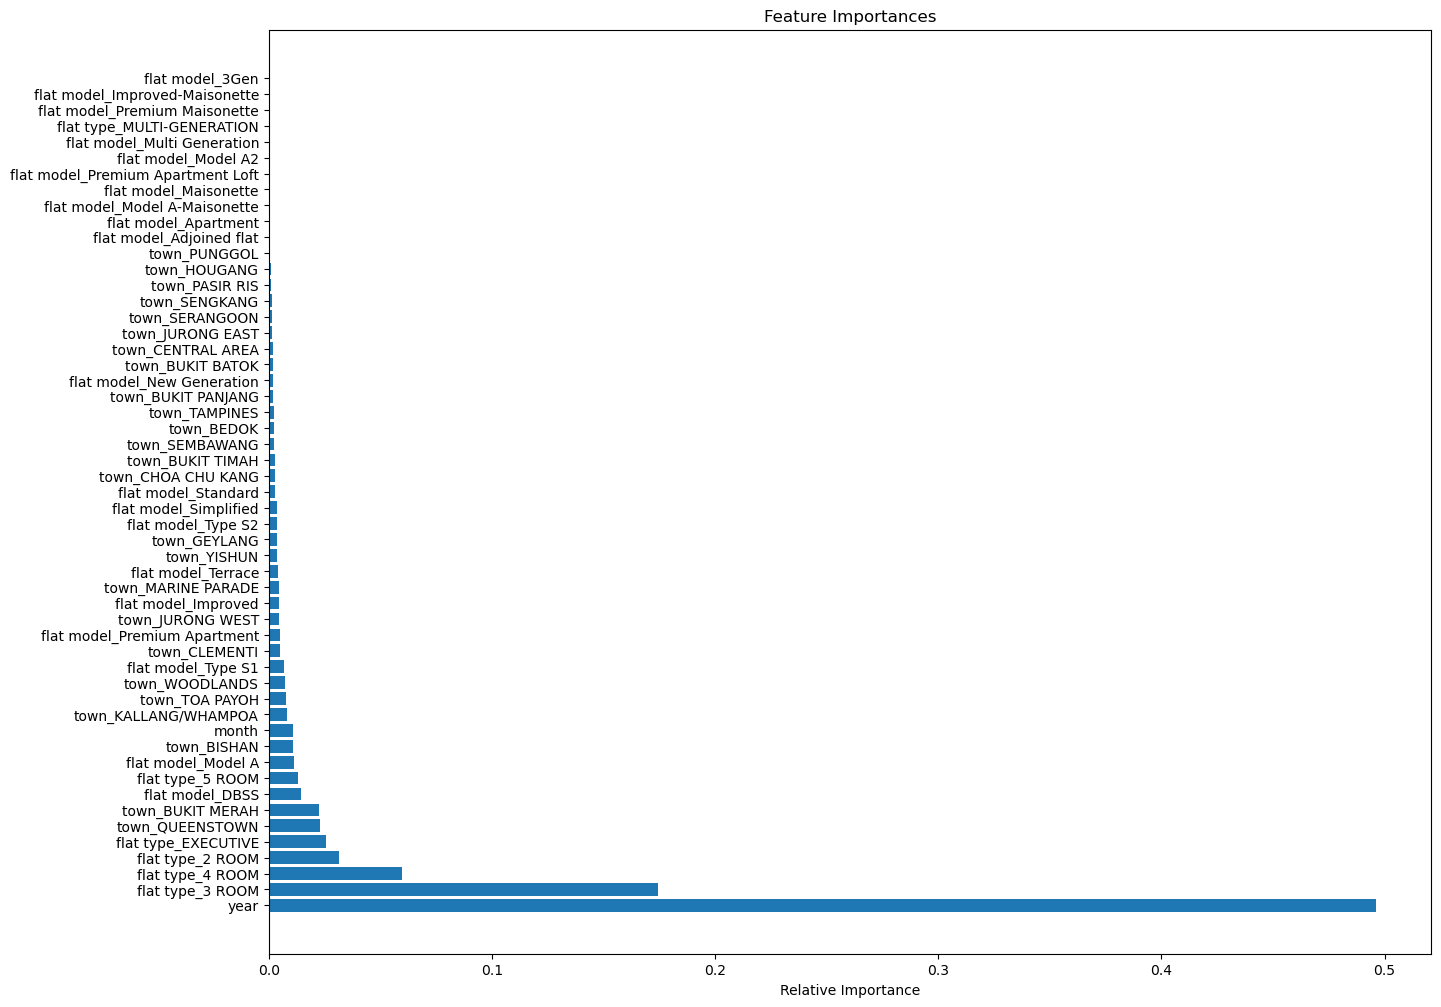

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data (Assuming 'hdb.csv' is in the same directory)
df = pd.read_csv('hdb.csv')

# Clean and preprocess data
df.columns = df.columns.str.strip()  # Clean column names
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['resale price'] = df['resale price'].replace(r'\$', '', regex=True).replace(r',', '', regex=True).astype(float)

# Feature engineering: Create dummy variables for relevant features
df = pd.get_dummies(df, columns=['flat type', 'town', 'flat model'], drop_first=True)

# Extract year and month as separate features
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

# Select features and target variable
X = df[['year', 'month'] + [col for col in df.columns if col.startswith('flat type') or col.startswith('town') or col.startswith('flat model')]]
y = df['resale price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Feature importance chart
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(15, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# Provide solid Decision Tree-based model to predict resale prices, along with clear evaluations and insights into the most important features.

In [40]:
from IPython.display import HTML

HTML('<div style="font-size: 25px; font-weight: bold;">'
     'END OF REPORT'
     '</div>')